<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([7.0066543 , 7.40462913, 6.68734788, 2.66735492, 3.93636641,
       4.4197356 , 5.16914168, 7.9489308 , 4.93033261, 6.26207919])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

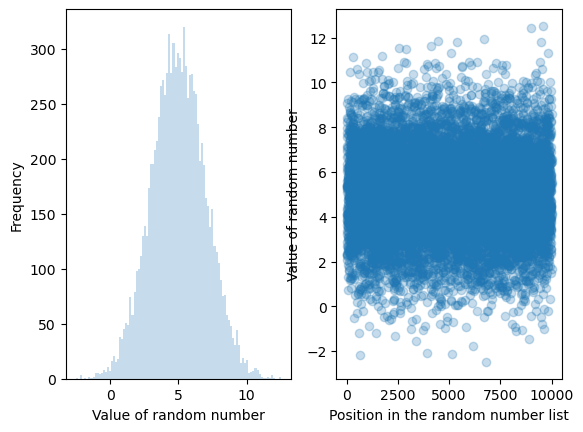

In [3]:
from matplotlib import pyplot as plt
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [13]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.02%


## 1 Brownian Motion in 1D

### 1.1 The scenario

Particle is restricted to moving in 1D(left or right in a single line).
probability(right) = p.
probability(left) = q = (1-p).

### 1.2 The simulation

In [15]:
import numpy.random as rnd
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

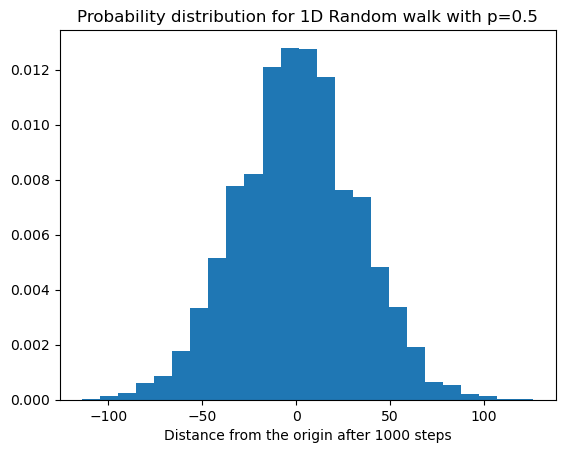

In [16]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

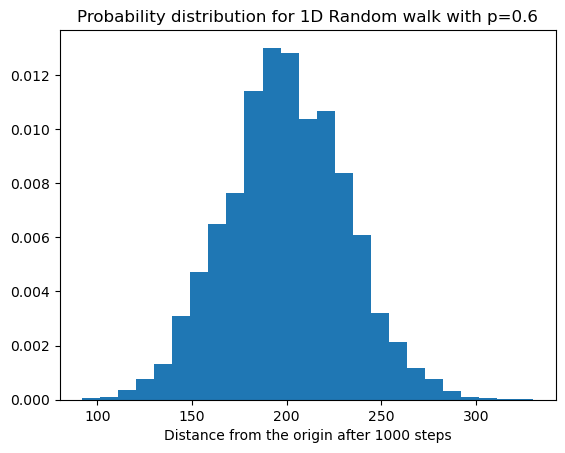

In [20]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

NameError: name 'prob_right' is not defined

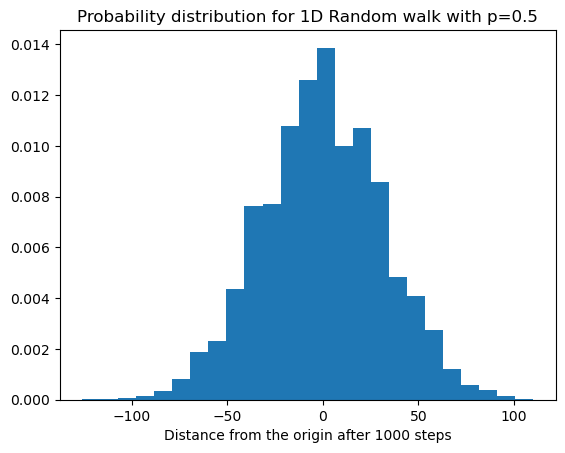

In [29]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [ ]:

# Your code here


### 2.3 A better solution

In [ ]:

# Your code here


### 2.4 A smarter solution

In [ ]:

# Your code here


## Exercise 1 :  Vital Stats of Random π

In [ ]:



# Your solution here


